## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
aggColumn = 'Tumor Volume (mm3)'
agg_mean = merged[aggColumn].mean()
agg_median = merged[aggColumn].median()
agg_var = merged[aggColumn].var()
agg_std = merged[aggColumn].std()
agg_sem = st.sem(merged[aggColumn])
aggData = [['Mean', agg_mean], 
           ['Median', agg_median], 
           ['Variance', agg_var], 
           ['Standard Deviation', agg_std],
           ['SEM', agg_sem]
          ]
newdf = pd.DataFrame(aggData, columns = ['Aggregate', 'Tumor Volume (mm3)'])
newdf.head()

,Aggregate,Tumor Volume (mm3)
0,Mean,50.448381
1,Median,48.951474
2,Variance,79.116074
3,Standard Deviation,8.894722
4,SEM,0.204436


## Bar plots

Text(0, 0.5, 'Number of Data Points')

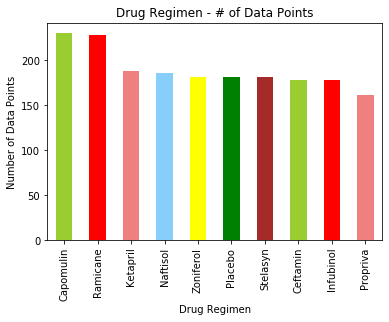

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
grp = "Drug Regimen"

# Collect the data points 
x = merged.groupby(grp)["Mouse ID"].count()

# convert from series to dataframe
df = pd.DataFrame(x).reset_index()
df.columns = ['Drug Regimen', 'Data Points']
df = df.sort_values('Data Points', ascending = False)

# a simple line plot
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "yellow", "green", "brown"]
df.plot(kind='bar',x='Drug Regimen',y='Data Points', color=colors, legend = False, title="Drug Regimen - # of Data Points")

# Give the chart an x label, and y label
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

## Pie plots

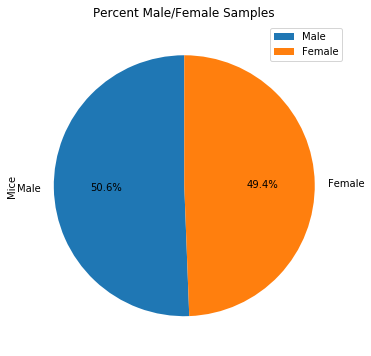

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grp = "Sex"

# Collect the data points 
x = merged.groupby(grp)["Mouse ID"].count()

# convert from series to dataframe
df = pd.DataFrame(x).reset_index()
df.columns = ['Sex', 'Mice']
df = df.sort_values('Mice', ascending = False)
df.index = df["Sex"]

df.plot(kind='pie'
        , x='Sex'
        , y='Mice'
        , figsize=(6, 6)
        , autopct='%1.1f%%'
        , startangle=90
        , legend = True
        , title="Percent Male/Female Samples"
       )


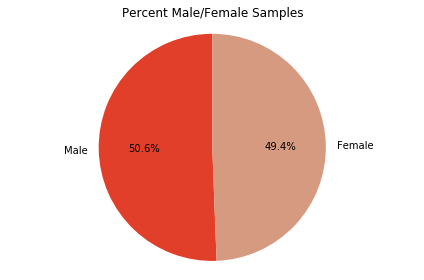

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Colors
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    df['Mice'],
    # with the labels being officer names
    labels=df['Sex'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set the title
plt.title("Percent Male/Female Samples")

# View the plot
plt.tight_layout()
plt.show()

## Quartiles, outliers and boxplots

In [6]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [7]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [8]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [9]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [10]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen